In [1]:
import pandas as pd
df = pd.read_csv('FO_PaDEL_MOE.csv')
df

C:\Users\lglv\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,molecule_chembl_id,new_standard_value,units,Weight,EM,M,uM,Class_2,pMIC(M),PubchemFP0,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL401764,ug ml-1,6.25,456.04599,Br/C(/C(=O)c1cc([N+](=O)[O-])ccc1)=C(/Br)\c1cc...,0.000014,1.370476e+01,inactive,4.863129,1,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1082888,ug ml-1,1.00,351.60400,BrCC=1c2c(OC(=O)C=1)cc(C)c(S(Cl)(=O)=O)c2,0.000003,2.844109e+00,active,5.546054,1,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1241729,ug ml-1,15.00,402.20801,Brc1c(/C=N/NC(=O)Cn2ncc3c2ccc([N+](=O)[O-])c3)...,0.000037,3.729414e+01,inactive,4.428359,1,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4064771,ug ml-1,16.00,425.14801,Brc1c(/C=N/Nc2sc3c(C)cccc3n2)ccc(Br)c1,0.000038,3.763395e+01,inactive,4.424420,1,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1242250,ug ml-1,13.00,476.31100,Brc1c(C2N(NC(=O)Cn3ncc4c3ccc([N+](=O)[O-])c4)C...,0.000027,2.729309e+01,inactive,4.563947,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,CHEMBL461847,uM,2000000.00,244.23000,[O-]/[N+](=N\[O-])/N1CCN(c2ccccc2)CC1.[Na+],2.000000,2.000000e+06,inactive,-0.301030,1,...,0,0,0,0,0,0,0,0,0,0
752,CHEMBL4466279,ug ml-1,100.00,213.20399,n1(-c2ccccc2)nnc(-c2[nH]nnn2)c1,0.000469,4.690344e+02,inactive,3.328795,1,...,0,0,0,0,0,0,0,0,0,0
753,CHEMBL1762184,ug ml-1,100.00,296.33398,n1(C2CCNCC2)nnc(-c2nc(-c3ccccc3)on2)c1,0.000337,3.374571e+02,inactive,3.471781,1,...,0,0,0,0,0,0,0,0,0,0
754,CHEMBL603654,ug ml-1,40.00,383.45898,n1(C2CCNCC2)nnc(-c2nc(c(-c3ccccc3)nn2)-c2ccccc...,0.000104,1.043136e+02,inactive,3.981659,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,9:]
X.shape


(756, 881)

In [7]:
y = df['pMIC(M)']
y

0      4.863129
1      5.546054
2      4.428359
3      4.424420
4      4.563947
         ...   
751   -0.301030
752    3.328795
753    3.471781
754    3.981659
755    3.542363
Name: pMIC(M), Length: 756, dtype: float64

# Finding constant features

(756, 881) (756,)
>Threshold=0.00, Features=563
>Threshold=0.05, Features=367
>Threshold=0.10, Features=273
>Threshold=0.15, Features=185


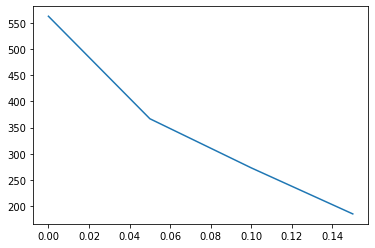

In [8]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
%matplotlib inline
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.20, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

# Removing constan features

In [9]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.0):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_thres = remove_low_variance(X, threshold=0.0)
X_thres.shape

(756, 563)

In [10]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_thres, y, test_size = 0.20, random_state = 10)

print("The Shape of x train:", X_train.shape)
print("The Shape of x test:", X_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (604, 563)
The Shape of x test: (152, 563)
The Shape of y train: (604,)
The Shape of y test: (152,)


# Training 7 regression models

In [12]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold


def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: \n', r2_score(y_test, y_pred))
    print('')
    # Regression Report:
    print('Regression Report: \n',score(y_test, y_pred))

In [13]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model'])
models = {
    "KNR" : KNeighborsRegressor(),
    "DTR" : DecisionTreeRegressor(),
    "RFR" : RandomForestRegressor(),
    'BR' : BaggingRegressor(),
    'GBR' : GradientBoostingRegressor(),
    'ABR' : AdaBoostRegressor(),
    'XGB' : XGBRegressor()
          }

for abrev, model in models.items():
    
    model.fit(X_train, y_train)
    
    score = model.score(X_train, y_train) # Training score
    scores = cross_val_score(model, X_train, y_train, cv=10)
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold ) # kfold CV score
    
    y_pred = model.predict(X_test)
    X_train_pred = model.predict(X_train)
    
    train_MAE_acc = mean_absolute_error(y_train, X_train_pred)
    train_MSE_acc = mean_squared_error(y_train, X_train_pred)
    train_r2_acc = r2_score(y_train, X_train_pred)
    pred_accurasy_MAE = mean_absolute_error(y_test, y_pred)
    pred_accurasy_MSE = mean_squared_error(y_test, y_pred)
    pred_accurasy_R2 = r2_score(y_test, y_pred) # Accurasy score
    print('Model:', abrev)
    print("Training score: ", score)
    print('Accuracy_r2', pred_accurasy_R2)
    print('MAE', pred_accurasy_MAE)
    print('MSE', pred_accurasy_MSE, '\n')
    
    model_accuracy = model_accuracy.append({
        'Model': abrev, 
        'Accuracy_r2': pred_accurasy_R2,
        'MAE': pred_accurasy_MAE,
        'MSE': pred_accurasy_MSE,
        'CV_score': scores.mean(),
        'Kfold_CV': kf_cv_scores.mean(),
        'Training_scores': score,
    'Train_r2_acc': train_r2_acc},ignore_index=True)

Model: KNR
Training score:  0.8300400948059805
Accuracy_r2 0.8451335200084338
MAE 0.3237072182276316
MSE 0.25499858360439304 

Model: DTR
Training score:  0.9988221092784804
Accuracy_r2 0.5548931775049097
MAE 0.38426207968421056
MSE 0.7328997811216543 

Model: RFR
Training score:  0.9663259591994785
Accuracy_r2 0.8615491459279156
MAE 0.2885957143326917
MSE 0.22796909756793501 

Model: BR
Training score:  0.9484081182469772
Accuracy_r2 0.8092861623747897
MAE 0.324682961160011
MSE 0.3140237866246796 

Model: GBR
Training score:  0.896759824966195
Accuracy_r2 0.7545924302426201
MAE 0.42188651474275163
MSE 0.40408087468208764 

Model: ABR
Training score:  0.6468094835428865
Accuracy_r2 0.5604132954542781
MAE 0.6592732029311997
MSE 0.7238105175283011 

Model: XGB
Training score:  0.9965517015689306
Accuracy_r2 0.8351100249256631
MAE 0.3013730365790133
MSE 0.2715029753166041 



In [14]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy_r2')

,Model,Accuracy_r2,CV_score,Kfold_CV,MAE,MSE,Train_r2_acc,Training_scores
2,RFR,0.861549,0.634151,0.691508,0.288596,0.227969,0.966326,0.966326
0,KNR,0.845134,0.631497,0.624919,0.323707,0.254999,0.830040,0.830040
6,XGB,0.835110,0.617487,0.711968,0.301373,0.271503,0.996552,0.996552
3,BR,0.809286,0.611265,0.632569,0.324683,0.314024,0.948408,0.948408
4,GBR,0.754592,0.626176,0.632552,0.421887,0.404081,0.896760,0.896760
5,ABR,0.560413,0.436545,0.403788,0.659273,0.723811,0.646809,0.646809
1,DTR,0.554893,0.433106,0.356906,0.384262,0.732900,0.998822,0.998822


# Manual parameter tuning

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
n_estimators = 100
max_features = 'auto'
RFR_model = RandomForestRegressor(n_estimators = n_estimators, max_features = max_features, random_state=4)
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

In [16]:
y_pred = RFR_model.predict(X_test)
print('TS:', RFR_model.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))


TS: 0.9645320475894232
MAE: 0.2949196905975691
MSE: 0.24729495480734778
r2: 0.8498121102111579


# Randomized Search CV

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [21]:
best_RandomGrid=rf_random.best_estimator_

In [22]:
y_pred_RG = best_RandomGrid.predict(X_test)
print('TS:', best_RandomGrid.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred_RG))
print('MSE:', mean_squared_error(y_test, y_pred_RG))
print('r2:', r2_score(y_test, y_pred_RG))

TS: 0.9988221091376996
MAE: 0.2659154499737459
MSE: 0.20557031701778197
r2: 0.8751524383496779


In [23]:
import pickle

In [24]:
with open('best_RandomGrid_pickle', 'wb') as file:
    pickle.dump(best_RandomGrid, file)

In [25]:
with open('best_RandomGrid_pickle', 'rb') as file:
    brgp = pickle.load(file)

## **Scatter Plot of Experimental vs Predicted pMIC Values**

<function matplotlib.pyplot.show(close=None, block=None)>

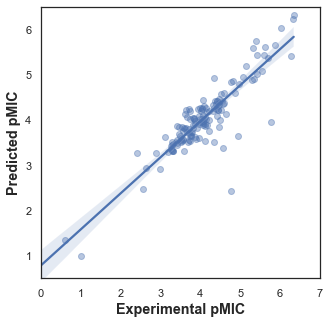

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred_RG, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pMIC', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pMIC', fontsize='large', fontweight='bold')
ax.set_xlim(0, 7)
ax.set_ylim(0.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.show

# GridSearch CV

In [26]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 

In [27]:
param_grid = {
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2, 
                         rf_random.best_params_['min_samples_leaf'] + 4],
    'min_samples_split':  [rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 200, rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100, rf_random.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [200, 300, 400, 500, 600]}


In [28]:
#### Fit the grid_search to the data
rf_GS=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf_GS,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [29]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [33]:
best_Grid=grid_search.best_estimator_

In [34]:
y_pred_Grid = best_Grid.predict(X_test)
print('TS:', best_Grid.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred_Grid))
print('MSE:', mean_squared_error(y_test, y_pred_Grid))
print('r2:', r2_score(y_test, y_pred_Grid))

TS: 0.9699847993373859
MAE: 0.3079909617077976
MSE: 0.24464863439489132
r2: 0.8514192812056556


In [36]:
with open('best_Grid_pickle', 'wb') as file:
    pickle.dump(best_Grid, file)

In [37]:
with open('best_Grid_pickle', 'rb') as file:
    bgp = pickle.load(file)

# **Predictions digastate 6.1**

In [38]:
df_61_PaDEL = pd.read_csv('df_61to_pred_PaDEL.csv')
df_61_PaDEL.head(2)

,Peak,Name,6.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,60,"Sulfurous acid, hexadecyl pentyl ester",0.609,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,"Sulfurous acid, 2-ethylhexyl pentyl ester",0.295,[SH0](=O)(OCC(CCCC)CC)OCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_61_features = df_61_PaDEL[X_thres.columns]
df_61_features.head(2)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,...,PubchemFP828,PubchemFP830,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP839,PubchemFP840,PubchemFP860,PubchemFP861,PubchemFP863
0,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
preditions_61 = brgp.predict(df_61_features)
preditions_61

array([3.68815625, 3.83129362, 3.82363321, 3.82363321, 3.82363321,
       4.07421796, 2.83630268, 2.90233064, 3.17117896, 3.88793751,
       3.14621189, 3.89672208, 2.40647586, 3.05260572, 3.98735927,
       3.97073179, 4.06998227, 3.96783993, 4.01295805, 3.96011814,
       4.04941119, 3.82385411, 3.3414855 , 4.06248196, 3.93065255,
       1.47425311, 3.90783192, 3.62233099, 3.60171632, 4.24352988,
       3.67344784, 3.59842292, 3.94571139, 3.61184047, 4.12043796,
       4.12043796, 4.12043796, 4.12043796, 4.13604003, 4.14830738,
       3.86833403, 4.14830738, 3.86833403, 3.66391214, 3.62790501,
       3.87814242, 3.56632102, 3.86482405, 3.93806087, 3.89923333,
       3.58200613, 3.94124374, 3.76186395, 3.62790501, 3.39963659,
       3.1985509 , 3.83127321, 4.71653362, 3.33146732, 4.1733351 ,
       3.43382358, 3.96228171, 3.65329308, 3.76186395, 4.12043796,
       3.68815625, 3.25370983, 3.87030223, 3.58569427, 3.61185159,
       3.8085751 , 4.13592623])

In [41]:
pMIC_pred = preditions_61
Molecule_ID = df_61_PaDEL['Name']
df_61_PaDEL['Molecule_ID'] = Molecule_ID
df_61_PaDEL['pMIC_pred'] = pMIC_pred
df_61_PaDEL.head(3)

,Peak,Name,6.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,60,"Sulfurous acid, hexadecyl pentyl ester",0.609,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, hexadecyl pentyl ester",3.688156
1,39,"Sulfurous acid, 2-ethylhexyl pentyl ester",0.295,[SH0](=O)(OCC(CCCC)CC)OCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl pentyl ester",3.831294
2,81,"Sulfurous acid, octadecyl 2-propyl ester",0.832,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, octadecyl 2-propyl ester",3.823633


In [42]:
Results = ['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados = df_61_PaDEL[Results]
df_resultados.head(10)

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
0,60,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,0.609,"Sulfurous acid, hexadecyl pentyl ester",3.688156
1,39,[SH0](=O)(OCC(CCCC)CC)OCCCCC,0.295,"Sulfurous acid, 2-ethylhexyl pentyl ester",3.831294
2,81,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCCCCC,0.832,"Sulfurous acid, octadecyl 2-propyl ester",3.823633
3,43,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCC,0.204,"Sulfurous acid, pentadecyl 2-propyl ester",3.823633
4,49,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCC,0.266,"Sulfurous acid, 2-propyl tridecyl ester",3.823633
5,42,S(=O)(=O)([O-])CC12C(C)(C)C(CC1=O)CC2,1.043,Camphorsulfonic acid,4.074218
6,6,Oc1ccccc1,1.879,phenol,2.836303
7,9,Oc1ccc(C)cc1,15.224,p-Cresol,2.902331
8,19,Oc1cc(CC)ccc1,6.228,"Phenol, 3-ethyl-",3.171179
9,7,OCC(CCCC)CC,0.417,"2-Ethyl,-1-hexanol",3.887938


In [43]:
final_predictions_61 = df_resultados[['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [44]:
final_predictions_61

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
57,17,O=C(CCCC)c1ccc(C)cc1,0.290,"1-Pentanone, 1-(4-methylphenyl)-",4.716534
29,52,Cc1c(C)cc2n[nH]nc2c1,12.471,"5,6-Dimethyl-1H-benzotriazole",4.243530
59,23,ClCOCC(C)C,4.840,"Propane, 1-(chloromethoxy)-2-methyl-",4.173335
41,31,C(CCCCCC)CCCCCC,0.337,Tridecane,4.148307
39,38,C(CCCCCCC)CCCCCC,0.717,Tetradecane,4.148307
38,44,C(CCCCCCC)CCCCCCC,0.883,Pentadecane,4.136040
71,54,O(CCCCCCCCCC)B(CC)CC,0.280,"Borane, diethyl(decyloxy)-",4.135926
64,34,C(CCCCCCCC)CCCCCCC,2.430,Hexadecane,4.120438
37,55,C(CCCCCCCC)CCCCCCCC,0.869,Heptadecane,4.120438
35,68,C(CCCCCCCCC)CCCCCCCCC,0.827,Nonadecane,4.120438


In [45]:
final_predictions_61.to_csv('FO_final_pred_61_2023.csv')

In [46]:
final_predictions_61_all = df_resultados[['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False)
final_predictions_61_all

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
57,17,O=C(CCCC)c1ccc(C)cc1,0.290,"1-Pentanone, 1-(4-methylphenyl)-",4.716534
29,52,Cc1c(C)cc2n[nH]nc2c1,12.471,"5,6-Dimethyl-1H-benzotriazole",4.243530
59,23,ClCOCC(C)C,4.840,"Propane, 1-(chloromethoxy)-2-methyl-",4.173335
41,31,C(CCCCCC)CCCCCC,0.337,Tridecane,4.148307
39,38,C(CCCCCCC)CCCCCC,0.717,Tetradecane,4.148307
...,...,...,...,...,...
13,45,O=C1Nc2c(cccc2)C1,6.290,"2H-Indol-2-one, 1,3-dihydro-",3.052606
7,9,Oc1ccc(C)cc1,15.224,p-Cresol,2.902331
6,6,Oc1ccccc1,1.879,phenol,2.836303
12,58,O=C1Nc2c(cccc2)C=C1,1.380,2(1H)-Quinolinone,2.406476


In [47]:
final_predictions_61_all.to_csv('final_predictions_61_all_2023.csv')

In [50]:
final_predictions_61_all_TotalArea = df_resultados[['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('6.1(Total Area (%))', ascending=False)
final_predictions_61_all_TotalArea

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
7,9,Oc1ccc(C)cc1,15.224,p-Cresol,2.902331
69,50,O=C1C(C(C)C)C(C)CCC1,14.980,"Cyclohexanone, 3-methyl-2-(1-methylethyl)-",3.611852
29,52,Cc1c(C)cc2n[nH]nc2c1,12.471,"5,6-Dimethyl-1H-benzotriazole",4.243530
21,71,O=C(OC(CCC)C)c1c(C(=O)OCCCC)cccc1,9.363,"Phthalic acid, butyl 2-pentyl ester",3.823854
24,3,O(CCO)CCCC,9.122,"Ethanol, 2-butoxy-",3.930653
...,...,...,...,...,...
3,43,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCC,0.204,"Sulfurous acid, pentadecyl 2-propyl ester",3.823633
43,25,C(CC)(C)c1c(C)cc(C)cc1,0.202,"Benzene, 2,4-dimethyl-1-(1-methylpropyl)-",3.663912
25,78,N(C(C)C)(c1ccc(N)cc1)c1ccccc1,0.125,"1,4-Benzenediamine, N-(1-methylethyl)-N'-phenyl-",1.474253
26,51,Cc1nc2nc(C)ccc2c(C)c1,0.086,"1,8-Naphthyridine, 2,4,7-trimethyl-",3.907832


In [51]:
final_predictions_61_all_TotalArea.to_csv('final_predictions_61_all_TotalArea_2023.csv')

# **Predictions digastate 7.1**

In [52]:
df_71_PaDEL = pd.read_csv('df_71to_pred_PaDEL.csv')
df_71_PaDEL.head(2)

,Peak,Name,7.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,75,"cyclohexane, [1,1'-biphenyl]-4-yl-",0.072,c1(-c2ccccc2)ccc(C2CCCCC2)cc1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",1.235,[SH0](=O)(OCC(CCCC)CC)OCCCCCCCCCCCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_71_features = df_71_PaDEL[X_thres.columns]
df_71_features.shape

(81, 563)

In [54]:
preditions_71 = brgp.predict(df_71_features)
preditions_71

array([3.70607337, 3.68815625, 3.64837186, 3.85326142, 3.90082591,
       3.99858287, 4.03405831, 4.07421796, 3.27900377, 3.82679511,
       3.85470317, 3.47866677, 3.81480308, 3.83260812, 3.14621189,
       3.89672208, 3.82495802, 3.84388793, 2.40647586, 3.86679426,
       3.64115598, 3.97073179, 3.79362821, 3.98735927, 3.96783993,
       3.67215326, 4.01295805, 3.71557324, 4.04941119, 3.63318185,
       3.82385411, 3.67255804, 3.3414855 , 4.06248196, 3.29703371,
       3.84257714, 1.47425311, 3.7463498 , 4.1733351 , 3.52886078,
       3.60171632, 3.62233099, 3.43382358, 3.64639374, 3.62790501,
       4.24352988, 3.64639374, 3.67364637, 3.67344784, 3.86119953,
       3.76186395, 3.94571139, 3.91585831, 3.86833403, 3.89923333,
       4.12043796, 4.12043796, 4.12043796, 4.12043796, 4.12043796,
       4.13604003, 4.14830738, 4.14830738, 3.76414232, 3.81269482,
       3.92245677, 3.86833403, 3.86833403, 3.89083759, 3.64950211,
       3.66391214, 3.64950211, 3.64950211, 3.76198362, 3.76186

In [55]:
pMIC_pred = preditions_71
Molecule_ID = df_71_PaDEL['Name']
df_71_PaDEL['Molecule_ID'] = Molecule_ID
df_71_PaDEL['pMIC_pred'] = pMIC_pred
df_71_PaDEL.head(3)

,Peak,Name,7.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,75,"cyclohexane, [1,1'-biphenyl]-4-yl-",0.072,c1(-c2ccccc2)ccc(C2CCCCC2)cc1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"cyclohexane, [1,1'-biphenyl]-4-yl-",3.706073
1,61,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",1.235,[SH0](=O)(OCC(CCCC)CC)OCCCCCCCCCCCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",3.688156
2,9,"Sulfurous acid, 2-ethylhexyl hexyl ester",0.550,[SH0](=O)(OCC(CCCC)CC)OCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl hexyl ester",3.648372


In [56]:
Results_71 = ['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados_71 = df_71_PaDEL[Results_71]
df_resultados_71.shape

(81, 5)

In [57]:
final_predictions_71 = df_resultados_71[['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [58]:
final_predictions_71

,Peak,EM,7.1(Total Area (%)),Molecule_ID,pMIC_pred
45,52,Cc1c(C)cc2n[nH]nc2c1,7.036,"5,6-Dimethyl-1H-benzotriazole",4.243530
38,23,ClCOCC(C)C,6.450,"Propane, 1-(chloromethoxy)-2-methyl-",4.173335
62,31,C(CCCCCC)CCCCCC,0.676,Tridecane,4.148307
61,38,C(CCCCCCC)CCCCCC,1.663,Tetradecane,4.148307
60,44,C(CCCCCCC)CCCCCCC,2.341,Pentadecane,4.136040
58,55,C(CCCCCCCC)CCCCCCCC,1.595,Heptadecane,4.120438
55,35,C(CCCCCCCCCC)(CC)C,0.169,"Tridecane, 3-methyl-",4.120438
56,68,C(CCCCCCCCC)CCCCCCCCC,1.367,Nonadecane,4.120438
57,63,C(CCCCCCCCC)CCCCCCCC,1.466,Octadecane,4.120438
59,34,C(CCCCCCCC)CCCCCCC,7.150,Hexadecane,4.120438


In [59]:
final_predictions_71.to_csv('FO_final_pred_71_2023.csv')

In [60]:
final_predictions_71_all = df_resultados_71[['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False)
final_predictions_71_all

,Peak,EM,7.1(Total Area (%)),Molecule_ID,pMIC_pred
45,52,Cc1c(C)cc2n[nH]nc2c1,7.036,"5,6-Dimethyl-1H-benzotriazole",4.243530
38,23,ClCOCC(C)C,6.450,"Propane, 1-(chloromethoxy)-2-methyl-",4.173335
62,31,C(CCCCCC)CCCCCC,0.676,Tridecane,4.148307
61,38,C(CCCCCCC)CCCCCC,1.663,Tetradecane,4.148307
60,44,C(CCCCCCC)CCCCCCC,2.341,Pentadecane,4.136040
...,...,...,...,...,...
34,3,O(CCO)CCCC,4.918,"Ethanol, 2-butoxy-",3.297034
8,46,Oc1c(C(C)(C)C)cc(C(C)(C)C)cc1,0.655,"2,4-Di-tert-butylphenol",3.279004
14,2,O=Cc1c(O)cc(N(C)C)cc1,0.003,"benzaldehyde, 4-(dimethylamino)-2-hydroxy-",3.146212
18,26,O=C1C=CCCC1,0.650,2-Cyclohexen-1-one,2.406476


In [61]:
final_predictions_71_all.to_csv('final_predictions_71_all_2023.csv')

In [62]:
final_predictions_71_all_TotalArea = df_resultados_71[['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('7.1(Total Area (%))', ascending=False)
final_predictions_71_all_TotalArea

,Peak,EM,7.1(Total Area (%)),Molecule_ID,pMIC_pred
30,71,O=C(OC(CCC)C)c1c(C(=O)OCCCC)cccc1,21.207001,"Phthalic acid, butyl 2-pentyl ester",3.823854
75,51,C(C)C1C(CC)C(CC)C(CC)C(CC)C1CC,11.220000,"Cyclohexane, 1,2,3,4,5,6-hexaethyl-",3.736399
79,14,C(=CC(CC)C)C(C(C)C)C,9.060000,"4-Octene, 2,3,6-trimethyl-",3.653293
74,32,C(C)C1C(CC)CC(CC)C(CC)C1,8.740000,"Cyclohexane, 1,2,4,5-tetraethyl-, (1?,2?,4.?,5?)-",3.761864
59,34,C(CCCCCCCC)CCCCCCC,7.150000,Hexadecane,4.120438
...,...,...,...,...,...
32,5,O=C(CCCC(C)C)c1ccccc1,0.116000,"1-Hexanone, 5-methyl-1-phenyl-",3.341486
0,75,c1(-c2ccccc2)ccc(C2CCCCC2)cc1,0.072000,"cyclohexane, [1,1'-biphenyl]-4-yl-",3.706073
37,11,N#CC1(CCCCCCCC)C=CCC=C1,0.040000,"3-Cyano-3-octyl-1,4-cyclohexadiene",3.746350
20,4,O=C([O-])CO,0.032000,"Acetic acid, hydroxy-",3.641156


In [63]:
final_predictions_71_all_TotalArea.to_csv('final_predictions_71_all_TotalArea_2023.csv')

## **Predictions effluent**

In [115]:
effluent = pd.read_csv('effluent.csv')
effluent.head(56)

,Name,Formula,Reference mass,CAS ID,Score (Lib),Efluent(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,n-Propyl acetate,C5H10O2,102.10000,109-60-4,79.230003,0.034138,O=C(OCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"5-Diazo-1,3-cyclopentadiene",C5H4N2,92.00000,1192-27-4,50.250000,0.005674,[N+](=[N-])=C1C=CC=C1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acetic acid, butyl ester",C6H12O2,116.10000,123-86-4,61.990002,0.459614,O=C(OCCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"4,6-Octadiyn-3-one, 2-methyl-",C9H10O,134.10001,29743-33-7,53.360001,0.042009,O=C(C#CC#CC)C(C)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"Ethanol, 2-butoxy-",C6H14O2,118.10000,111-76-2,86.290001,4.680545,O(CCO)CCCC,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,"1-Hexanone, 5-methyl-1-phenyl-",C13H18O,190.10001,25552-17-4,59.799999,0.017002,O=C(CCCC(C)C)c1ccccc1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,"Benzene, 1,2,3-trimethyl-",C9H12,120.10000,526-73-8,56.889999,0.056330,Cc1c(C)cccc1C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,"3-Phenyl-1-propanol, acetate",C11H14O2,178.10001,122-72-5,56.950001,0.007811,O=C(OCCCc1ccccc1)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,"Benzene, tert-butyl-",C10H14,134.10001,98-06-6,79.239998,0.368385,C(C)(C)(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,"Benzeneacetaldehyde, .alpha.-methyl-",C9H10O,134.10001,93-53-8,74.059998,0.135806,O=CC(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
effluent_features = effluent[X_thres.columns]
effluent_features.shape

(55, 563)

In [105]:
preditions_effluent = brgp.predict(effluent_features)
preditions_effluent

array([4.14503943, 3.78627986, 4.14778058, 4.1539763 , 4.06248196,
       3.29703371, 3.62790501, 3.79996528, 3.64177036, 3.49322939,
       3.99788961, 3.58941692, 3.47887277, 3.59000678, 3.64280862,
       3.65591964, 3.60023313, 3.98871702, 3.65591964, 3.70891376,
       3.62233099, 4.13434192, 3.98871702, 4.15550494, 3.56632102,
       4.1590107 , 4.00918621, 3.98871702, 4.15550494, 2.97187592,
       3.89923333, 3.91483566, 3.98871702, 4.15550494, 3.88722236,
       3.98871702, 3.66520705, 3.98871702, 3.09289318, 4.08022407,
       3.83260812, 3.78669989, 3.94449977, 3.89075659, 3.94449977,
       4.29618049, 3.76959011, 3.93458005, 3.94449977, 4.17002019,
       3.77311994, 3.97758888, 3.76186395, 3.94449977, 3.76978377])

In [106]:
pMIC_pred = preditions_effluent
Molecule_ID = effluent['Name']
effluent['Molecule_ID'] = Molecule_ID
effluent['pMIC_pred'] = pMIC_pred
effluent.head(10)

,Name,Formula,Reference mass,CAS ID,Score (Lib),Efluent(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,n-Propyl acetate,C5H10O2,102.10000,109-60-4,79.230003,0.034138,O=C(OCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,n-Propyl acetate,4.145039
1,"5-Diazo-1,3-cyclopentadiene",C5H4N2,92.00000,1192-27-4,50.250000,0.005674,[N+](=[N-])=C1C=CC=C1,1,0,0,...,0,0,0,0,0,0,0,0,"5-Diazo-1,3-cyclopentadiene",3.786280
2,"Acetic acid, butyl ester",C6H12O2,116.10000,123-86-4,61.990002,0.459614,O=C(OCCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,"Acetic acid, butyl ester",4.147781
3,"4,6-Octadiyn-3-one, 2-methyl-",C9H10O,134.10001,29743-33-7,53.360001,0.042009,O=C(C#CC#CC)C(C)C,1,1,0,...,0,0,0,0,0,0,0,0,"4,6-Octadiyn-3-one, 2-methyl-",4.153976
4,"Ethanol, 2-butoxy-",C6H14O2,118.10000,111-76-2,86.290001,4.680545,O(CCO)CCCC,1,1,0,...,0,0,0,0,0,0,0,0,"Ethanol, 2-butoxy-",4.062482
5,"1-Hexanone, 5-methyl-1-phenyl-",C13H18O,190.10001,25552-17-4,59.799999,0.017002,O=C(CCCC(C)C)c1ccccc1,1,1,1,...,0,0,0,0,0,0,0,0,"1-Hexanone, 5-methyl-1-phenyl-",3.297034
6,"Benzene, 1,2,3-trimethyl-",C9H12,120.10000,526-73-8,56.889999,0.056330,Cc1c(C)cccc1C,1,1,0,...,0,0,0,0,0,0,0,0,"Benzene, 1,2,3-trimethyl-",3.627905
7,"3-Phenyl-1-propanol, acetate",C11H14O2,178.10001,122-72-5,56.950001,0.007811,O=C(OCCCc1ccccc1)C,1,1,0,...,0,0,0,0,0,0,0,0,"3-Phenyl-1-propanol, acetate",3.799965
8,"Benzene, tert-butyl-",C10H14,134.10001,98-06-6,79.239998,0.368385,C(C)(C)(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,"Benzene, tert-butyl-",3.641770
9,"Benzeneacetaldehyde, .alpha.-methyl-",C9H10O,134.10001,93-53-8,74.059998,0.135806,O=CC(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,"Benzeneacetaldehyde, .alpha.-methyl-",3.493229


In [107]:
Results_effluent = ['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados_effluen = effluent[Results_effluent]
df_resultados_effluen.head(20)

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
0,O=C(OCCC)C,0.034138,n-Propyl acetate,4.145039
1,[N+](=[N-])=C1C=CC=C1,0.005674,"5-Diazo-1,3-cyclopentadiene",3.786280
2,O=C(OCCCC)C,0.459614,"Acetic acid, butyl ester",4.147781
3,O=C(C#CC#CC)C(C)C,0.042009,"4,6-Octadiyn-3-one, 2-methyl-",4.153976
4,O(CCO)CCCC,4.680545,"Ethanol, 2-butoxy-",4.062482
5,O=C(CCCC(C)C)c1ccccc1,0.017002,"1-Hexanone, 5-methyl-1-phenyl-",3.297034
6,Cc1c(C)cccc1C,0.056330,"Benzene, 1,2,3-trimethyl-",3.627905
7,O=C(OCCCc1ccccc1)C,0.007811,"3-Phenyl-1-propanol, acetate",3.799965
8,C(C)(C)(C)c1ccccc1,0.368385,"Benzene, tert-butyl-",3.641770
9,O=CC(C)c1ccccc1,0.135806,"Benzeneacetaldehyde, .alpha.-methyl-",3.493229


In [108]:
final_predictions_effuent = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [109]:
final_predictions_effuent

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
45,BrC(CCCC)C,0.070257,"Hexane, 2-bromo-",4.296180
49,C(#CCCC(C)C)C(C)(C)C,0.397699,"3-Octyne, 2,2,7-trimethyl-",4.170020
25,FC(F)(F)C(=O)OC(C(C)(C)C)C,0.055177,"1,2,2-Trimethylpropyl trifluoroacetate",4.159011
23,ICCCCCCCCCCCCCC,0.114970,"Tetradecane, 1-iodo-",4.155505
33,ICCCCCCCCCCC,0.290302,1-Iodoundecane,4.155505
28,ICCCCCCCCC,0.153649,"Nonane, 1-iodo-",4.155505
3,O=C(C#CC#CC)C(C)C,0.042009,"4,6-Octadiyn-3-one, 2-methyl-",4.153976
2,O=C(OCCCC)C,0.459614,"Acetic acid, butyl ester",4.147781
0,O=C(OCCC)C,0.034138,n-Propyl acetate,4.145039
21,O=C(O)CCC,0.109937,"Butanoic acid, 4-(1,1-dimethylethoxy)-3-hydrox...",4.134342


In [110]:
final_predictions_effuent.to_csv('FO_final_effluent_2023.csv')

In [111]:
final_predictions_effuent_all = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False)
final_predictions_effuent_all

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
45,BrC(CCCC)C,0.070257,"Hexane, 2-bromo-",4.296180
49,C(#CCCC(C)C)C(C)(C)C,0.397699,"3-Octyne, 2,2,7-trimethyl-",4.170020
25,FC(F)(F)C(=O)OC(C(C)(C)C)C,0.055177,"1,2,2-Trimethylpropyl trifluoroacetate",4.159011
23,ICCCCCCCCCCCCCC,0.114970,"Tetradecane, 1-iodo-",4.155505
33,ICCCCCCCCCCC,0.290302,1-Iodoundecane,4.155505
28,ICCCCCCCCC,0.153649,"Nonane, 1-iodo-",4.155505
3,O=C(C#CC#CC)C(C)C,0.042009,"4,6-Octadiyn-3-one, 2-methyl-",4.153976
2,O=C(OCCCC)C,0.459614,"Acetic acid, butyl ester",4.147781
0,O=C(OCCC)C,0.034138,n-Propyl acetate,4.145039
21,O=C(O)CCC,0.109937,"Butanoic acid, 4-(1,1-dimethylethoxy)-3-hydrox...",4.134342


In [112]:
final_predictions_effuent_all.to_csv('final_predictions_effuent_all_2023.csv')

In [113]:
final_predictions_effuent_all_TotalArea = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('Efluent(Total Area (%))', ascending=False)
final_predictions_effuent_all_TotalArea

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
47,O=C(O)CCCCCCC/C=C/CCCCCCCC,21.720486,"9-Octadecenoic acid, (E)-",3.934580
54,O=C(OCC(CCC)CCC)c1c(C(=O)OCC(CCC)CCC)cccc1,20.748056,"Phthalic acid, di(2-propylpentyl) ester",3.769784
42,O=C(O)CCCCCCCCCCCCCCC,14.833975,n-Hexadecanoic acid,3.944500
48,O=C(O)CCCCCCCCCCCCCCCCC,10.547825,Octadecanoic acid,3.944500
46,O1C2C1CC1OC2CC=C1,7.086389,"3,10-Dioxatricyclo[4.3.1.0(2,4)]dec-7-ene, (1....",3.769590
4,O(CCO)CCCC,4.680545,"Ethanol, 2-butoxy-",4.062482
41,O=C(OCCCCC)c1c(C(=O)OCCCC)cccc1,2.176448,"Phthalic acid, butyl 2-pentyl ester",3.786700
51,OCCCCCCCCCC1OC1,2.142093,"10,11-Epoxy-n-undecan-1-ol",3.977589
17,O=C(O)CCCCCCC,1.202159,Octanoic acid,3.988717
16,c12-c(ccc1)ccccc2,1.120080,Azulene,3.600233


In [114]:
final_predictions_effuent_all_TotalArea.to_csv('final_predictions_effuent_all_TotalArea_2023.csv')

## **K-fold Cross Validation**

In [24]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

num_folds = 10
seed = 4
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
kf_model = RandomForestRegressor()
results = cross_val_score(kf_model, X_train, y_train, cv=kfold)
kf_model.fit(X_train, y_train)
r2 = kf_model.score(X_train, y_train)
print(r2)

y_pred = kf_model.predict(X_test)
y_pred.shape

y_pred = kf_model.predict(X_test)
print('TS:', kf_model.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
scores = cross_val_score(kf_model, X_train, y_train, cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(kf_model, X_train, y_train, cv=kfold )
print('cv_score:', scores.mean())
print('Kfold cv:', kf_cv_scores.mean())


0.965585834246137
TS: 0.965585834246137
MAE: 0.3373085762622272
MSE: 0.37535149383082367
r2: 0.7985881843313312
cv_score: 0.6949088259450111
Kfold cv: 0.7625738752983179


# Leave One Out Cross Validation

In [26]:
# Evaluate using Leave One Out Cross Validation
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

num_folds = 10
loocv = LeaveOneOut()
model_loocv = RandomForestRegressor()
results = cross_val_score(model_loocv, X_train, y_train, cv=loocv)
model_loocv.fit(X_train, y_train)
r2 = model_loocv.score(X_train, y_train)
print(r2)

y_pred = model_loocv.predict(X_test)
y_pred.shape

print('TS:', model_loocv.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
scores = cross_val_score(model_loocv, X_train, y_train, cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model_loocv, X_train, y_train, cv=kfold )
print('cv_score:', scores.mean())
print('Kfold cv:', kf_cv_scores.mean())

0.9646377423709926
TS: 0.9646377423709926
MAE: 0.3395696727917445
MSE: 0.3769482958679798
r2: 0.7977313479983126
cv_score: 0.7065445236429497
Kfold cv: 0.7365113963909061


# Randomized Search CV

In [48]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [49]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
rfreg_randomcv=RandomizedSearchCV(estimator=rfreg,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rfreg_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.2min finished
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [50]:
rfreg_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'mse'}

In [51]:
rfreg_randomcv

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [52]:
best_random_grid=rfreg_randomcv.best_estimator_

In [53]:
y_pred = best_random_grid.predict(X_test)
print('TS:', best_random_grid.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
scores = cross_val_score(best_random_grid, X_train, y_train, cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(best_random_grid, X_train, y_train, cv=kfold )
print('cv_score:', scores.mean())
print('Kfold cv:', kf_cv_scores.mean())

TS: 0.9745221996441487
MAE: 0.3936280196831532
MSE: 0.4131904067938715
r2: 0.7782840046808536
cv_score: 0.7633630484424024
Kfold cv: 0.8133363668103964


# GridSearch CV

In [54]:
rfreg_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'mse'}

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rfreg_randomcv.best_params_['criterion']],
    'max_depth': [rfreg_randomcv.best_params_['max_depth']],
    'max_features': [rfreg_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rfreg_randomcv.best_params_['min_samples_leaf'], 
                         rfreg_randomcv.best_params_['min_samples_leaf']+2, 
                         rfreg_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split':  [rfreg_randomcv.best_params_['min_samples_split'], 
                          rfreg_randomcv.best_params_['min_samples_split'] +1,
                          rfreg_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rfreg_randomcv.best_params_['n_estimators'] - 200, rfreg_randomcv.best_params_['n_estimators'] - 100, 
                     rfreg_randomcv.best_params_['n_estimators'], 
                     rfreg_randomcv.best_params_['n_estimators'] + 100, rfreg_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['mse'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [61]:
#### Fit the grid_search to the data
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 18.4min finished
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mse'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4], 'n_estimators': [1400, 1500, 1600, 1700, 1800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=560,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
best_grid=grid_search.best_estimator_

In [64]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=560,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
y_pred = best_grid.predict(X_test)
print('TS:', best_grid.score(X_train, y_train))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
scores = cross_val_score(best_grid, X_train, y_train, cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(best_grid, X_train, y_train, cv=kfold )
print('cv_score:', scores.mean())
print('Kfold cv:', kf_cv_scores.mean())

TS: 0.9744631318630768
MAE: 0.3904069553637318
MSE: 0.40734837903656834
r2: 0.7814188088234355
cv_score: 0.7634010063307416
Kfold cv: 0.801534472705692
